In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression,RidgeCV
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor 
from sklearn.metrics import classification_report,accuracy_score,root_mean_squared_error,confusion_matrix,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
data = sns.load_dataset('tips')
data.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [5]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


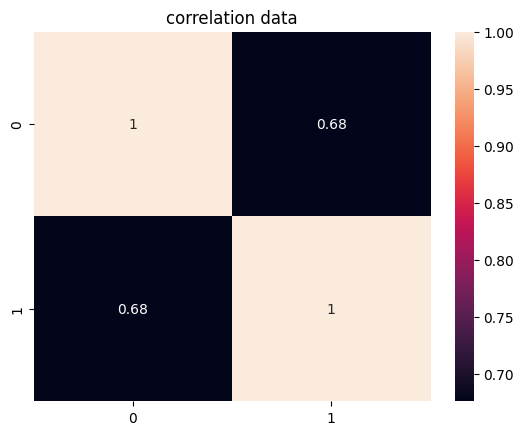

In [6]:
matrix = np.corrcoef(data['total_bill'],data['tip'])
sns.heatmap(matrix,annot=True)
plt.title('correlation data')
plt.show()


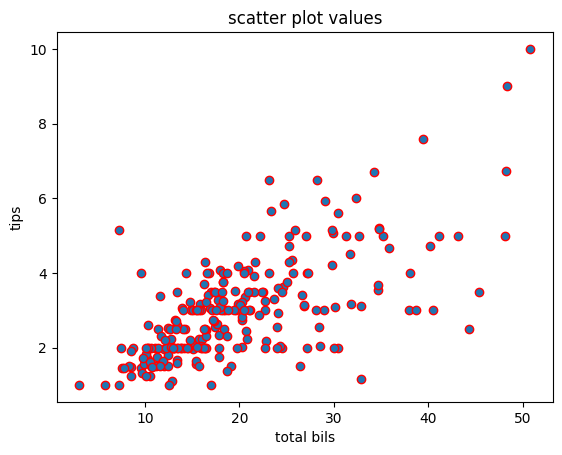

In [7]:
plt.scatter(data['total_bill'],data['tip'],edgecolors='red')

plt.xlabel('total bils')
plt.ylabel('tips')
plt.title('scatter plot values')
plt.show()

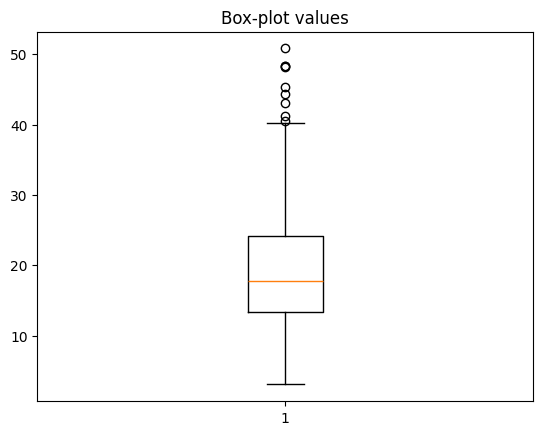

In [8]:
plt.boxplot(data['total_bill'])
plt.title('Box-plot values')
plt.show()

In [9]:
data.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [10]:
data.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [11]:
col=['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']
for i in col:
    if data[i].dtype in ['int','float']:
        q1=data[i].quantile(0.25)
        q3=data[i].quantile(0.75)
        iqr=q3-q1
        lower_bound=q1-1.5*iqr
        upper_bound=q3+1.5*iqr
        data=data[(data[i]>=lower_bound) & (data[i]<=upper_bound)]

In [12]:
data['tip'] = data['tip'].apply(lambda x: int(x))

# LabelEncoder

In [13]:
cate_col = ['sex','smoker', 'day','time']
Logistic_regression = LogisticRegression()

label_encoder = LabelEncoder()
for col in cate_col:
    data[col] = label_encoder.fit_transform(data[col])

x =  data.drop('tip',axis=1)
y = data['tip']

In [14]:
x_train,x_test , y_train , y_test = train_test_split(x,y,test_size=0.8,random_state=16)

accuracy_values = {}

model_fit =  Logistic_regression.fit(x_train,y_train)
y_prd_nor = model_fit.predict(x_test)
accuracy  =  accuracy_score(y_prd_nor,y_test)
print(accuracy)
print(classification_report(y_prd_nor,y_test))

accuracy_values['root_mean_squared_error'] = root_mean_squared_error(y_prd_nor,y_test)
accuracy_values['mean_squared_error'] = mean_squared_error(y_prd_nor,y_test)
accuracy_values['mean_absolute_error'] = mean_absolute_error(y_prd_nor,y_test)

0.3825136612021858
              precision    recall  f1-score   support

           1       0.54      0.62      0.58        32
           2       0.59      0.37      0.45        95
           3       0.22      0.34      0.27        35
           4       0.18      0.14      0.16        21
           5       0.00      0.00      0.00         0

    accuracy                           0.38       183
   macro avg       0.31      0.30      0.29       183
weighted avg       0.46      0.38      0.41       183



c:\Users\420317\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\420317\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\420317\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:153

In [15]:
accuracy_values

{'root_mean_squared_error': 1.1063650915710395,
 'mean_squared_error': 1.2240437158469946,
 'mean_absolute_error': 0.7978142076502732}

# RidgeCV

In [16]:
import numpy as np

accuracy_values_rig = {}
ridge_regression_ = RidgeCV()

model_fit = ridge_regression_.fit(x_train, y_train)
y_prd_ri = model_fit.predict(x_test)

# Calculate regression metrics
accuracy_values_rig['root_mean_squared_error'] = np.sqrt(mean_squared_error(y_test, y_prd_ri))
accuracy_values_rig['mean_squared_error'] = mean_squared_error(y_test, y_prd_ri)
accuracy_values_rig['mean_absolute_error'] = mean_absolute_error(y_test, y_prd_ri)

In [17]:
accuracy_values_rig

{'root_mean_squared_error': 0.9382135259115938,
 'mean_squared_error': 0.880244620203465,
 'mean_absolute_error': 0.7446610628499492}